<a href="https://colab.research.google.com/github/olfabre/AMS-Application-BI-V2/blob/main/BI_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse exploratoire


A. Analyse descriptive par attribut (univariée)

Pour chaque colonne :

- type

- distribution

- stats (moyenne, médiane, quartiles, mode…)

- graphique adapté

- valeurs étranges / manquantes

- remarques pour futur nettoyage

B. Analyse des associations (bivariée)

- numérique ↔ numérique : corrélation (Pearson/Spearman/Kendall), scatterplot

- numérique ↔ catégoriel : violinplot / boxplot

- catégoriel ↔ catégoriel : tableau croisé + chi²

C. Préparation pour la suite

- normalisation, encodage, etc.

- passage au pipeline de classification

charge le fichier ks-projects.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ks-projects.csv to ks-projects.csv


chargement + préparation basique

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ks-projects.csv", encoding='latin1')   # adapte selon ton chemin

pd.set_option('display.max_columns', None)
df.head()

,id,name,category,subcategory,country,sex,age,start_date,end_date,currency,goal,pledged,backers,state
0,149450711,Abilities Rock,Art,Art,US,male,26,2015-11-17 19:37:50,2015-12-17 19:37:50,USD,10000.0,0.0,0,failed
1,356418410,De'VIA Elders Reunion,Art,Art,US,female,26,2016-03-21 22:18:52,2016-04-23 04:00:00,USD,7500.0,958.0,15,failed
2,412253775,Help C.B. Farr make a documentary about becomi...,Art,Art,US,female,28,2013-06-05 08:30:31,2013-07-05 08:30:31,USD,20000.0,0.0,0,failed
3,477821027,The London Aesthetifest,Art,Art,US,female,27,2014-06-24 19:49:35,2014-07-15 04:05:00,USD,7800.0,1000.0,15,failed
4,350951514,Hobo Nickels across the nation,Art,Art,US,male,22,2015-10-02 16:00:42,2015-11-01 16:00:42,USD,2621.0,392.0,6,failed


## 3. Section 1 — Analyse par attributs

### 3.1. Trouver automatiquement le type de variable

In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300627 entries, 0 to 300626
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           300627 non-null  int64  
 1   name         300623 non-null  object 
 2   category     300627 non-null  object 
 3   subcategory  300627 non-null  object 
 4   country      296830 non-null  object 
 5   sex          291719 non-null  object 
 6   age          300627 non-null  int64  
 7   start_date   300627 non-null  object 
 8   end_date     300627 non-null  object 
 9   currency     300627 non-null  object 
 10  goal         300627 non-null  float64
 11  pledged      300627 non-null  float64
 12  backers      300627 non-null  int64  
 13  state        300627 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 32.1+ MB


,id,name,category,subcategory,country,sex,age,start_date,end_date,currency,goal,pledged,backers,state
count,3.006270e+05,300623,300627,300627,296830,291719,300627.000000,300627,300627,300627,3.006270e+05,3.006270e+05,300627.000000,300627
unique,NaN,298680,15,158,18,2,NaN,300179,274233,10,NaN,NaN,NaN,6
top,NaN,New EP/Music Development,Film & Video,Product Design,US,female,NaN,1970-01-01 01:00:00,2012-01-01 05:59:00,USD,NaN,NaN,NaN,failed
freq,NaN,41,55032,15443,242613,147517,NaN,7,47,245351,NaN,NaN,NaN,156301
mean,4.992343e+08,NaN,NaN,NaN,NaN,NaN,27.620044,NaN,NaN,NaN,4.637402e+04,8.239740e+03,98.235581,NaN
std,2.888665e+08,NaN,NaN,NaN,NaN,NaN,7.206378,NaN,NaN,NaN,1.137581e+06,8.688740e+04,890.415481,NaN
min,4.701000e+03,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,1.000000e-02,0.000000e+00,0.000000,NaN
25%,2.493480e+08,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,2.000000e+03,3.000000e+01,2.000000,NaN
50%,4.987463e+08,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,5.000000e+03,6.010000e+02,12.000000,NaN
75%,7.497511e+08,NaN,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,1.500000e+04,3.825000e+03,54.000000,NaN


### 3.2. Traitement séparé: numériques / catégoriels

============ age ============


,age
count,300627.000000
mean,27.620044
std,7.206378
min,18.000000
25%,23.000000
50%,27.000000
75%,30.000000
max,70.000000


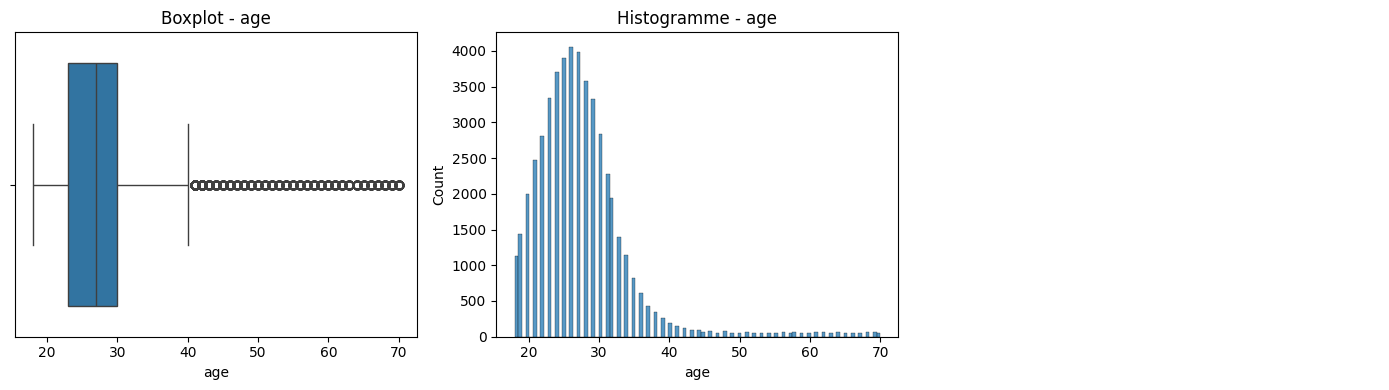

============ goal ============


,goal
count,3.006270e+05
mean,4.637402e+04
std,1.137581e+06
min,1.000000e-02
25%,2.000000e+03
50%,5.000000e+03
75%,1.500000e+04
max,1.000000e+08


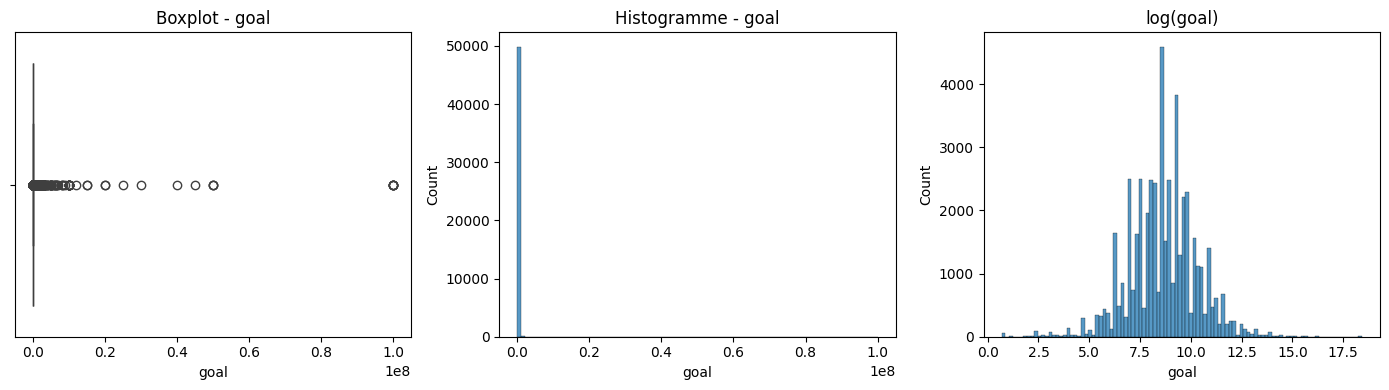

============ pledged ============


,pledged
count,3.006270e+05
mean,8.239740e+03
std,8.688740e+04
min,0.000000e+00
25%,3.000000e+01
50%,6.010000e+02
75%,3.825000e+03
max,2.033899e+07


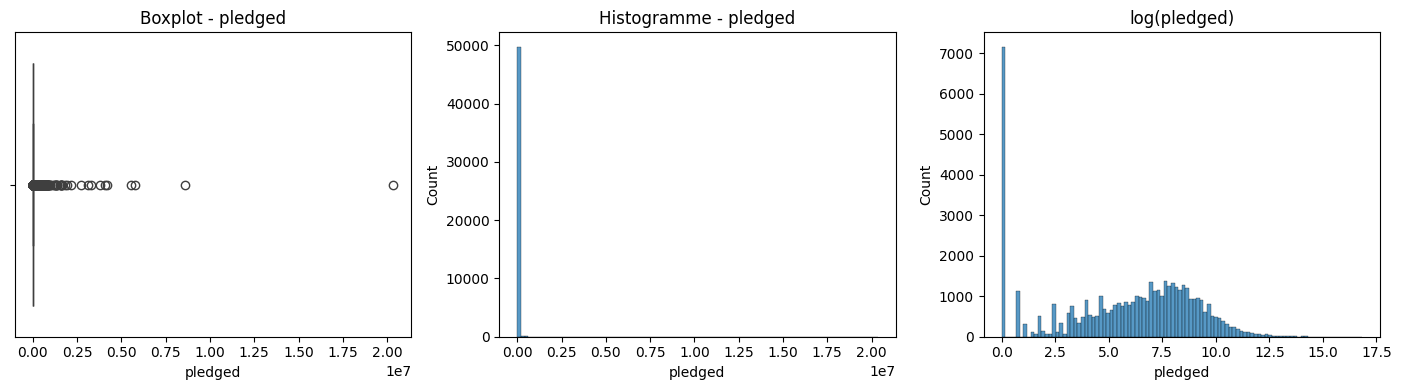

============ backers ============


,backers
count,300627.000000
mean,98.235581
std,890.415481
min,0.000000
25%,2.000000
50%,12.000000
75%,54.000000
max,219382.000000


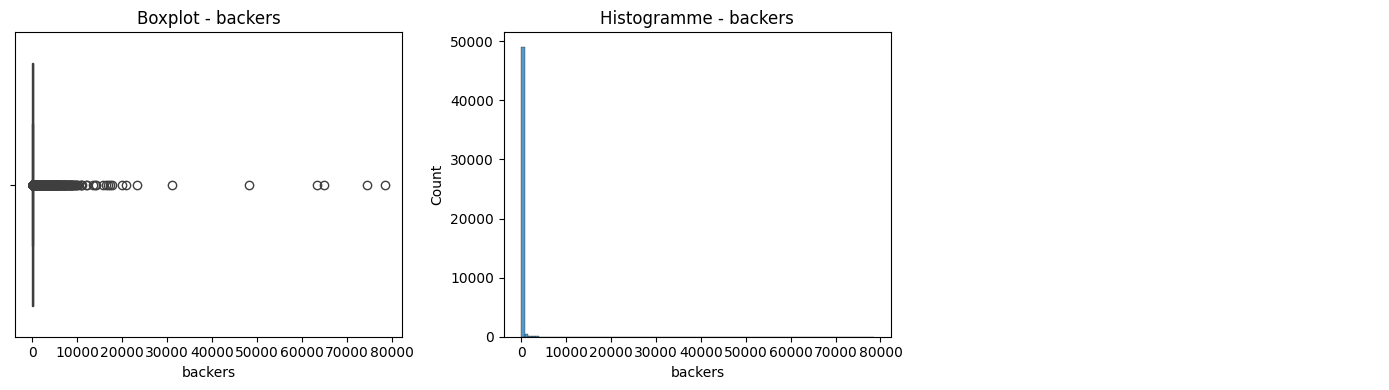

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ks-projects.csv", encoding='latin1')

numeric_cols = ['age', 'goal', 'pledged', 'backers']

for col in numeric_cols:
    print("============", col, "============")
    display(df[col].describe())

    # ÉCHANTILLONNAGE (300 000 lignes -> on prend 50 000 pour accélérer)
    sample = df[col].dropna()
    if len(sample) > 50000:
        sample = sample.sample(50000, random_state=0)

    plt.figure(figsize=(14,4))

    # Boxplot
    plt.subplot(1,3,1)
    sns.boxplot(x=sample)
    plt.title(f"Boxplot - {col}")

    # Histogramme SANS KDE
    plt.subplot(1,3,2)
    sns.histplot(sample, bins=100)   # rapide
    plt.title(f"Histogramme - {col}")

    # LOG-SCALE (uniquement goal & pledged)
    plt.subplot(1,3,3)
    if col in ['goal', 'pledged']:
        sns.histplot(np.log1p(sample), bins=100)
        plt.title(f"log({col})")
    else:
        plt.axis('off')

    plt.tight_layout()
    plt.show()


Aperçu du dataset :


,id,name,category,subcategory,country,sex,age,start_date,end_date,currency,goal,pledged,backers,state
0,149450711,Abilities Rock,Art,Art,US,male,26,2015-11-17 19:37:50,2015-12-17 19:37:50,USD,10000.0,0.0,0,failed
1,356418410,De'VIA Elders Reunion,Art,Art,US,female,26,2016-03-21 22:18:52,2016-04-23 04:00:00,USD,7500.0,958.0,15,failed
2,412253775,Help C.B. Farr make a documentary about becomi...,Art,Art,US,female,28,2013-06-05 08:30:31,2013-07-05 08:30:31,USD,20000.0,0.0,0,failed
3,477821027,The London Aesthetifest,Art,Art,US,female,27,2014-06-24 19:49:35,2014-07-15 04:05:00,USD,7800.0,1000.0,15,failed
4,350951514,Hobo Nickels across the nation,Art,Art,US,male,22,2015-10-02 16:00:42,2015-11-01 16:00:42,USD,2621.0,392.0,6,failed



Types des colonnes :
id               int64
name            object
category        object
subcategory     object
country         object
sex             object
age              int64
start_date      object
end_date        object
currency        object
goal           float64
pledged        float64
backers          int64
state           object
dtype: object

Statistiques descriptives :


,id,name,category,subcategory,country,sex,age,start_date,end_date,currency,goal,pledged,backers,state
count,3.006270e+05,300623,300627,300627,296830,291719,300627.000000,300627,300627,300627,3.006270e+05,3.006270e+05,300627.000000,300627
unique,NaN,298680,15,158,18,2,NaN,300179,274233,10,NaN,NaN,NaN,6
top,NaN,New EP/Music Development,Film & Video,Product Design,US,female,NaN,1970-01-01 01:00:00,2012-01-01 05:59:00,USD,NaN,NaN,NaN,failed
freq,NaN,41,55032,15443,242613,147517,NaN,7,47,245351,NaN,NaN,NaN,156301
mean,4.992343e+08,NaN,NaN,NaN,NaN,NaN,27.620044,NaN,NaN,NaN,4.637402e+04,8.239740e+03,98.235581,NaN
std,2.888665e+08,NaN,NaN,NaN,NaN,NaN,7.206378,NaN,NaN,NaN,1.137581e+06,8.688740e+04,890.415481,NaN
min,4.701000e+03,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,1.000000e-02,0.000000e+00,0.000000,NaN
25%,2.493480e+08,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,2.000000e+03,3.000000e+01,2.000000,NaN
50%,4.987463e+08,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,5.000000e+03,6.010000e+02,12.000000,NaN
75%,7.497511e+08,NaN,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,1.500000e+04,3.825000e+03,54.000000,NaN



Nombre de colonnes : 14
Nombre de lignes : 300627


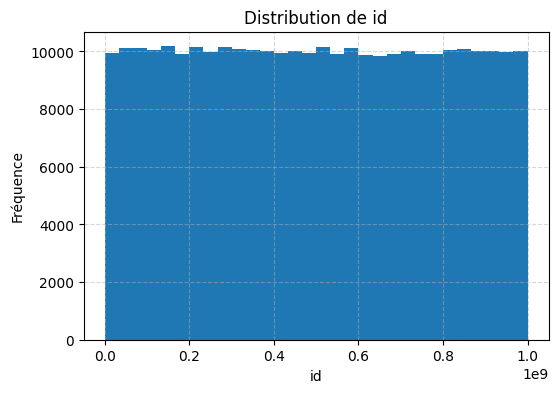

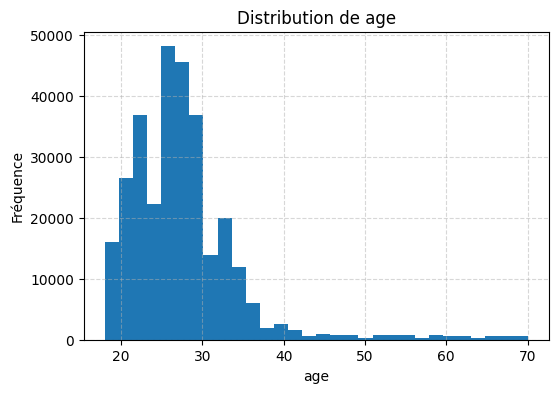

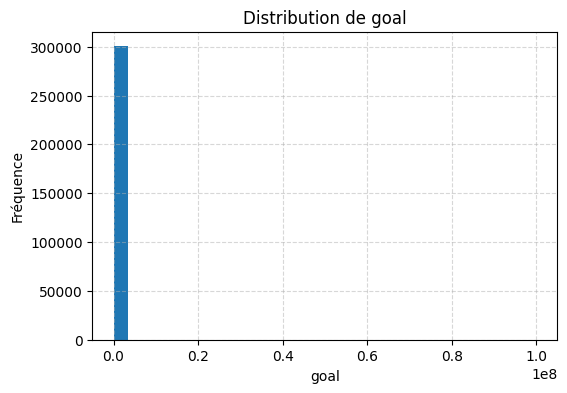

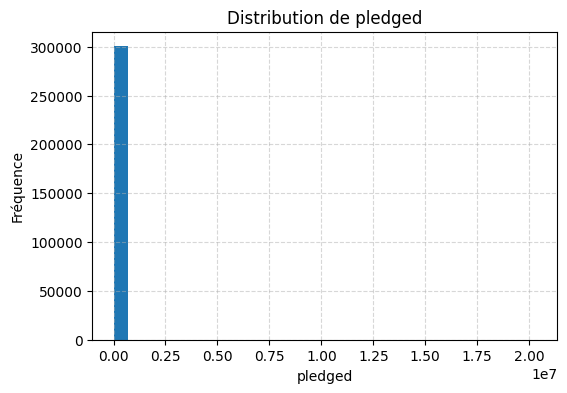

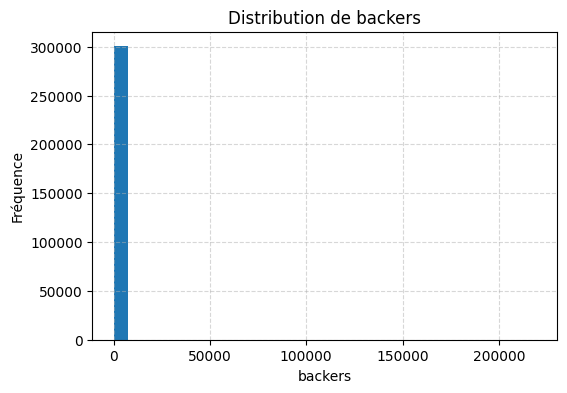

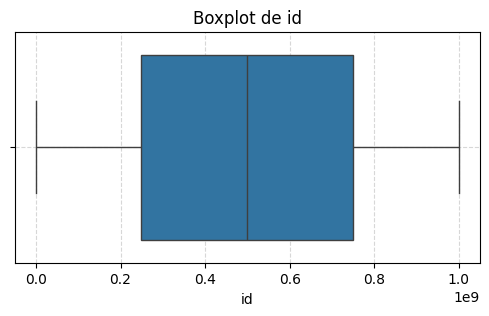

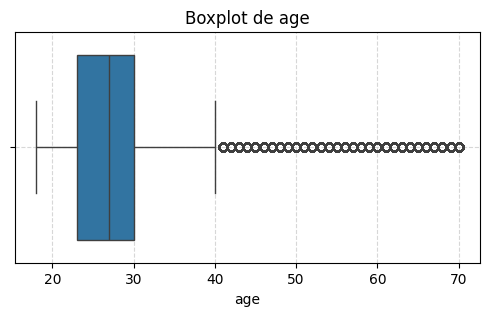

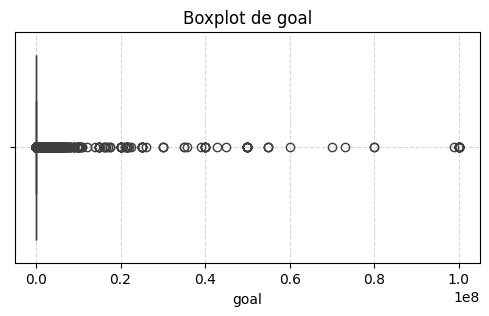

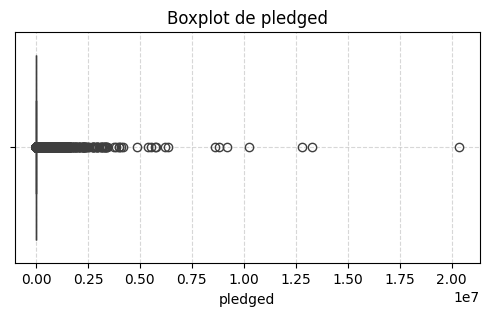

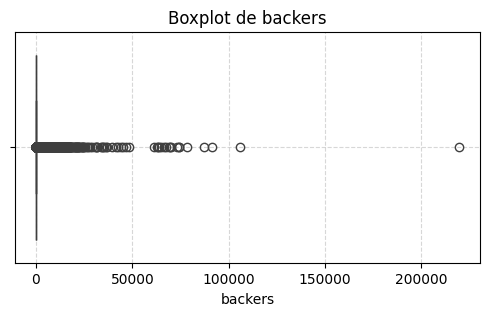

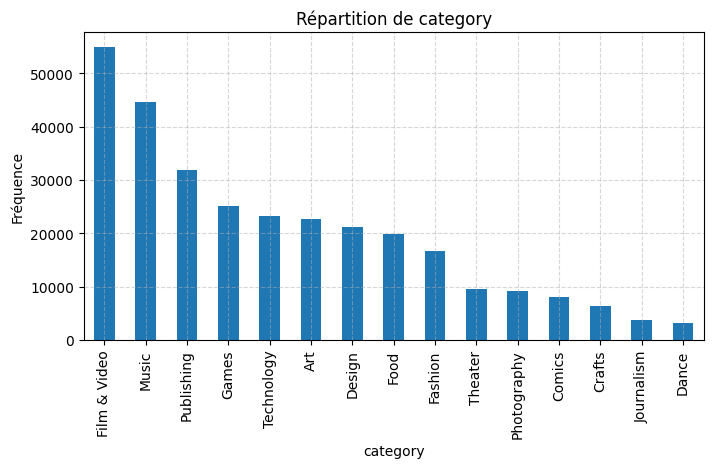

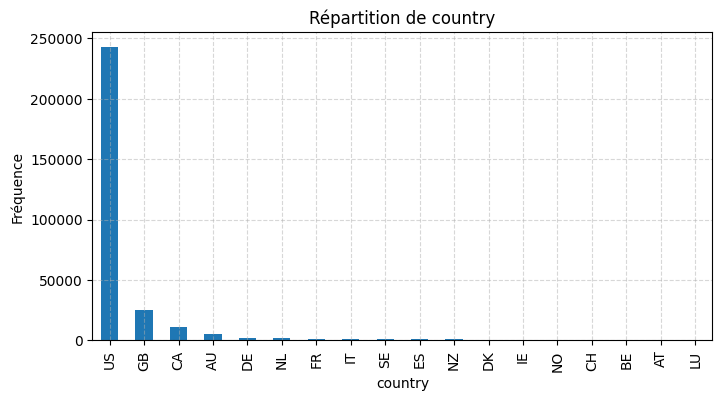

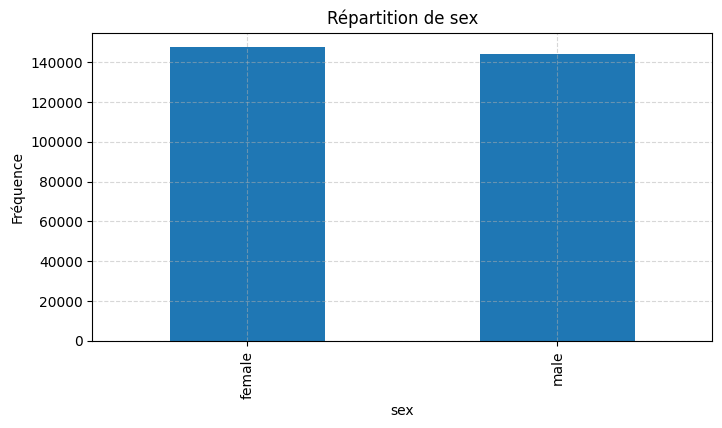

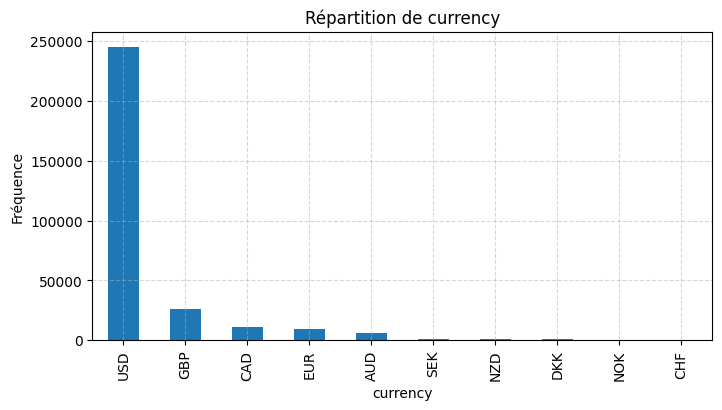

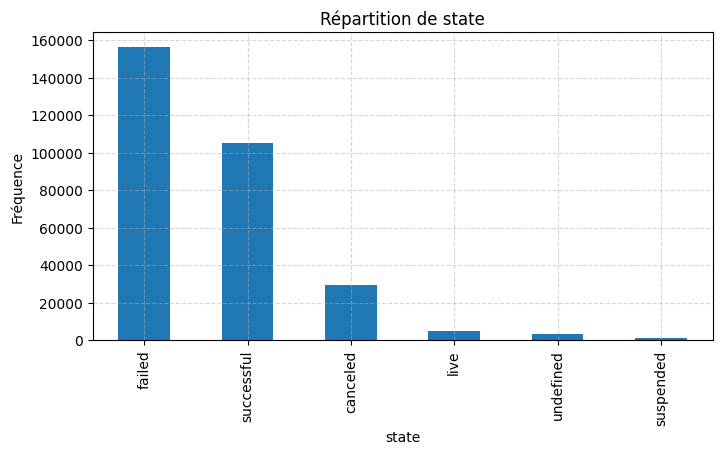

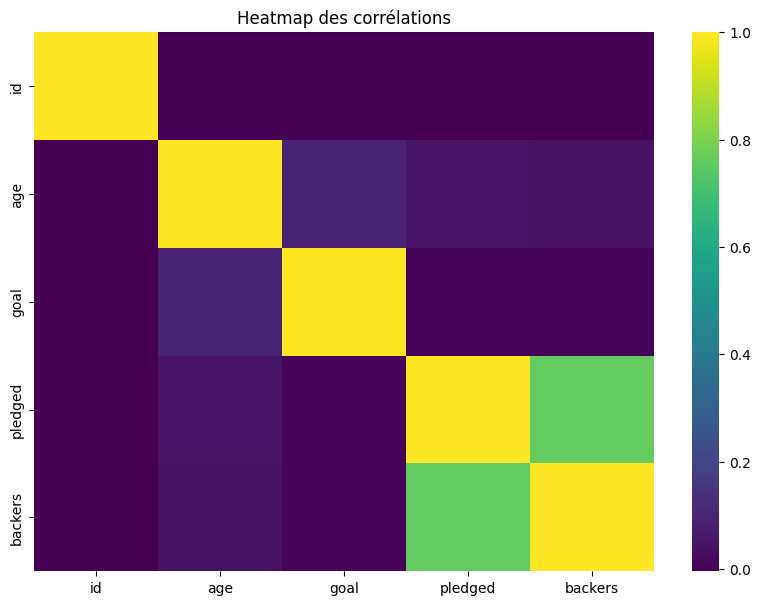

In [ ]:
# ================================
#        IMPORTS
# ================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype, is_object_dtype

# ================================
#        CHARGEMENT CSV
# ================================
df = pd.read_csv('ks-projects.csv', encoding='latin1')

# ================================
#        APERÇU & INFO
# ================================
print("Aperçu du dataset :")
display(df.head())

print("\nTypes des colonnes :")
print(df.dtypes)

print("\nStatistiques descriptives :")
display(df.describe(include='all'))

# ================================
#      NOMBRE D'ATTRIBUTS
# ================================
print("\nNombre de colonnes :", df.shape[1])
print("Nombre de lignes :", df.shape[0])

# ================================
#   HISTOGRAMMES (colonnes numériques)
# ================================
numeric_cols = [col for col in df.columns if is_numeric_dtype(df[col])]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

# ================================
#   BOXPLOTS (détection outliers)
# ================================
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

# ================================
# BARPLOTS (colonnes catégorielles)
# ================================
categorical_cols = [col for col in df.columns if is_object_dtype(df[col])]
categorical_cols

for col in categorical_cols:
    if df[col].nunique() <= 30:  # évite les colonnes avec trop de valeurs uniques
        plt.figure(figsize=(8,4))
        df[col].value_counts().plot(kind="bar")
        plt.title(f"Répartition de {col}")
        plt.xlabel(col)
        plt.ylabel("Fréquence")
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.show()

# ================================
#      HEATMAP CORRÉLATION
# ================================
plt.figure(figsize=(10,7))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap="viridis")
plt.title("Heatmap des corrélations")
plt.show()


Après les explications de l'enseignant

Nombre de lignes : 300627
Nombre de colonnes : 15

Types des colonnes :
id                        int64
name                     object
category                 object
subcategory              object
country                  object
sex                      object
age                       int64
start_date       datetime64[ns]
end_date         datetime64[ns]
currency                 object
goal                    float64
pledged                 float64
backers                   int64
state                    object
duration_days             int64
dtype: object

Statistiques descriptives :


,id,name,category,subcategory,country,sex,age,start_date,end_date,currency,goal,pledged,backers,state,duration_days
count,3.006270e+05,300623,300627,300627,296830,291719,300627.000000,300627,300627,300627,3.006270e+05,3.006270e+05,300627.000000,300627,300627.000000
unique,NaN,298680,15,158,18,2,NaN,NaN,NaN,10,NaN,NaN,NaN,6,NaN
top,NaN,New EP/Music Development,Film & Video,Product Design,US,female,NaN,NaN,NaN,USD,NaN,NaN,NaN,failed,NaN
freq,NaN,41,55032,15443,242613,147517,NaN,NaN,NaN,245351,NaN,NaN,NaN,156301,NaN
mean,4.992343e+08,NaN,NaN,NaN,NaN,NaN,27.620044,2014-02-03 23:11:50.587139328,2014-03-10 19:49:02.780116480,NaN,4.637402e+04,8.239740e+03,98.235581,NaN,34.672767
min,4.701000e+03,NaN,NaN,NaN,NaN,NaN,18.000000,1970-01-01 01:00:00,2009-05-03 08:59:59,NaN,1.000000e-02,0.000000e+00,0.000000,NaN,1.000000
25%,2.493480e+08,NaN,NaN,NaN,NaN,NaN,23.000000,2012-11-13 23:16:32,2012-12-15 22:53:11,NaN,2.000000e+03,3.000000e+01,2.000000,NaN,30.000000
50%,4.987463e+08,NaN,NaN,NaN,NaN,NaN,27.000000,2014-07-01 20:00:46,2014-08-01 18:03:55,NaN,5.000000e+03,6.010000e+02,12.000000,NaN,30.000000
75%,7.497511e+08,NaN,NaN,NaN,NaN,NaN,30.000000,2015-05-16 13:32:21.500000,2015-06-19 07:59:30,NaN,1.500000e+04,3.825000e+03,54.000000,NaN,38.000000
max,9.999995e+08,NaN,NaN,NaN,NaN,NaN,70.000000,2016-07-01 09:59:25,2016-08-30 06:36:19,NaN,1.000000e+08,2.033899e+07,219382.000000,NaN,16739.000000



Valeurs modales des colonnes :


,0
id,4701
name,New EP/Music Development
category,Film & Video
subcategory,Product Design
country,US
sex,female
age,26.0
start_date,1970-01-01 01:00:00
end_date,2012-01-01 05:59:00
currency,USD


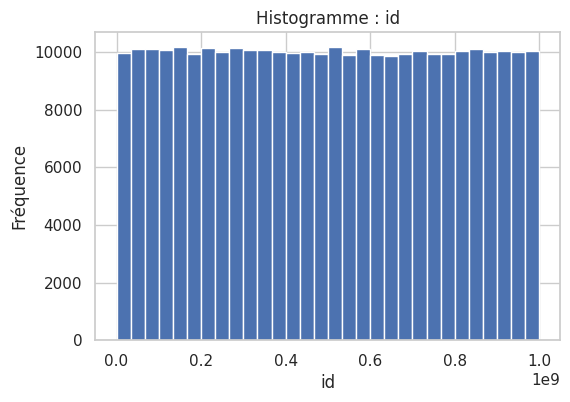

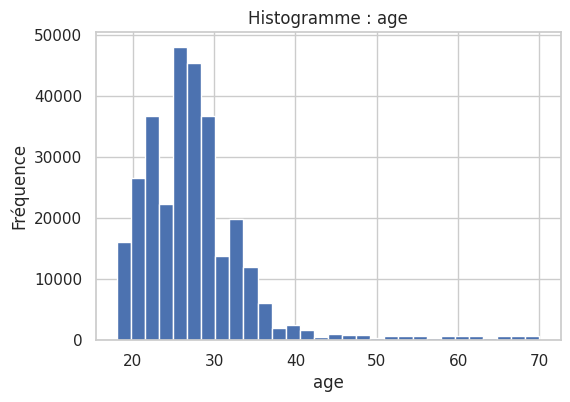

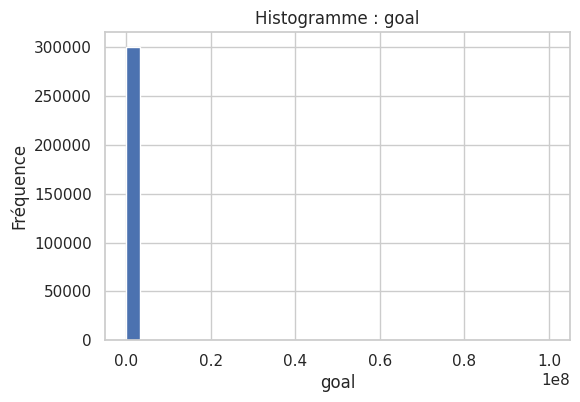

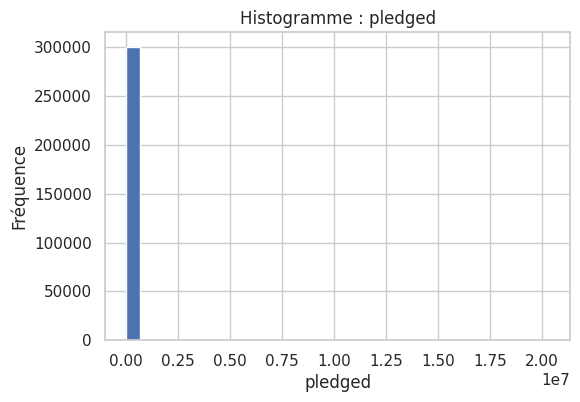

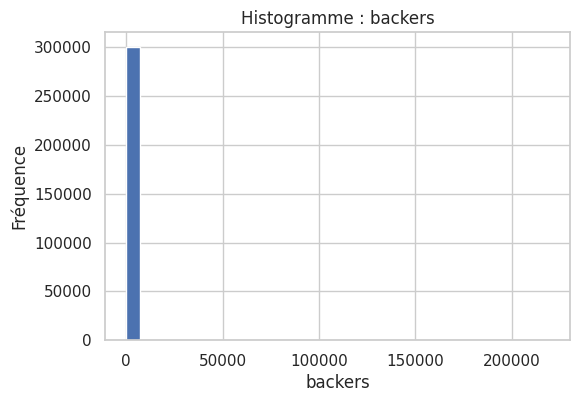

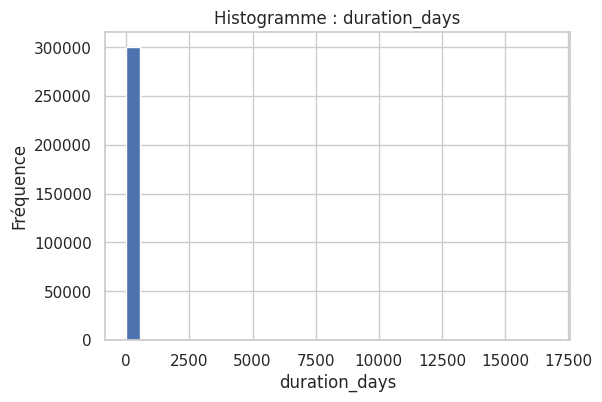

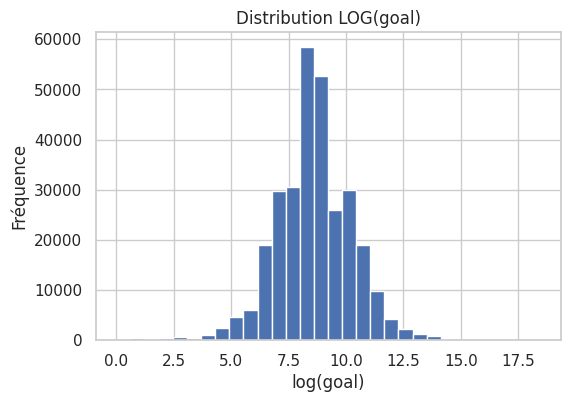

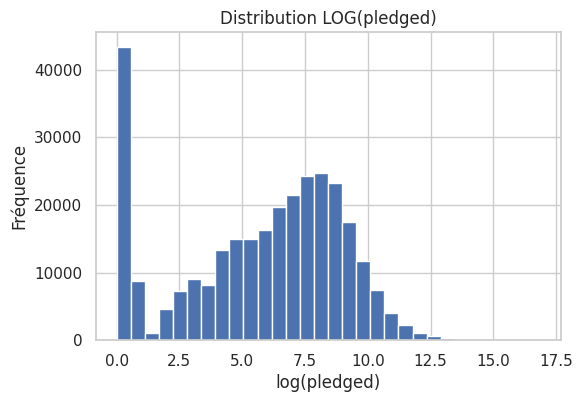

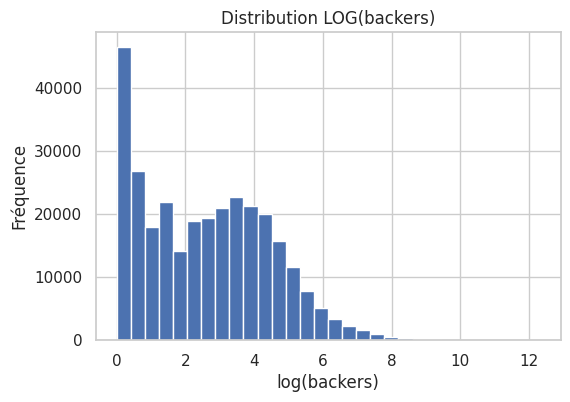

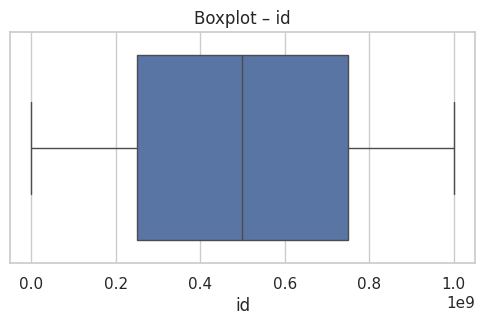

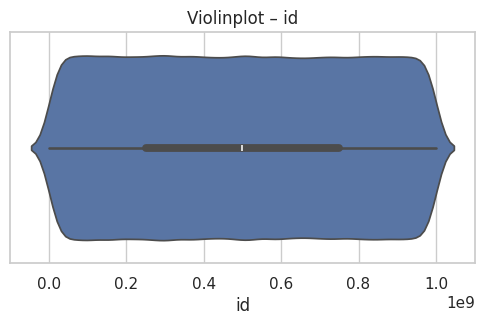

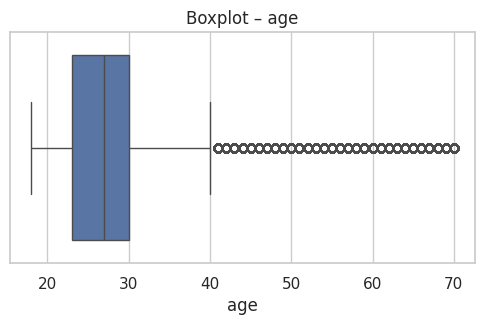

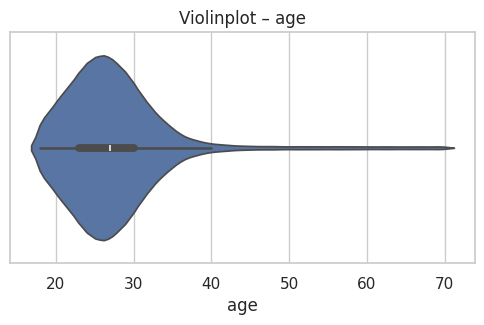

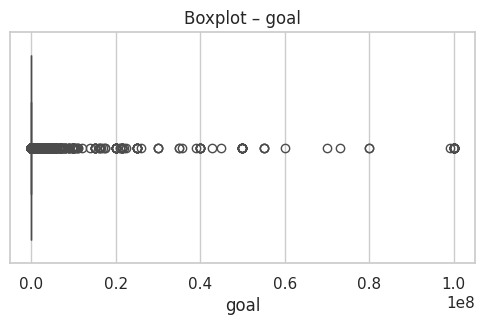

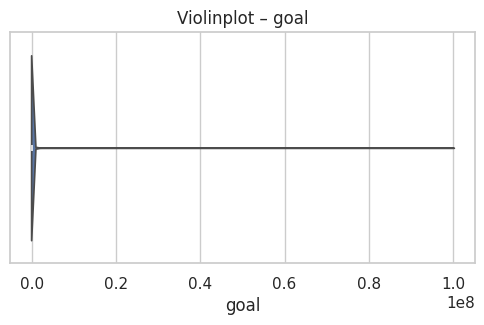

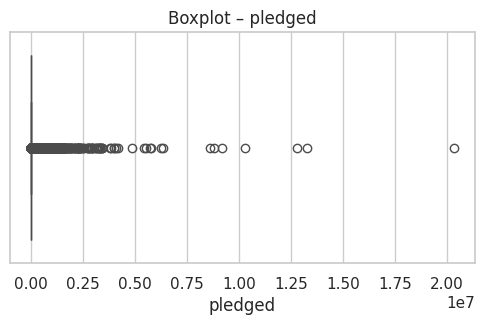

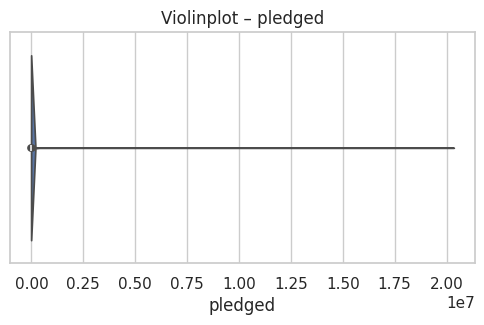

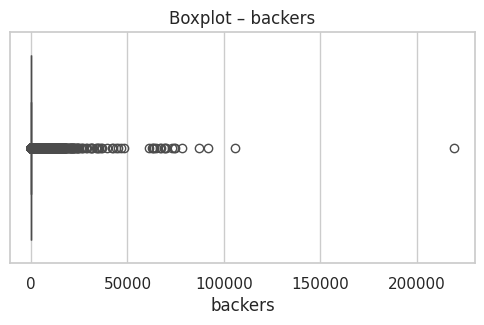

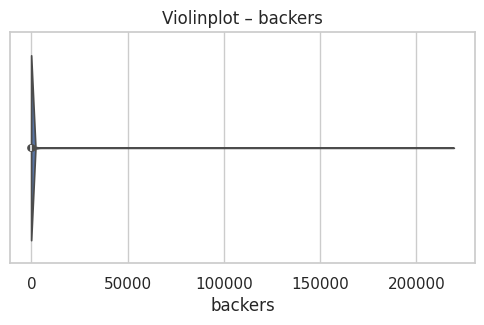

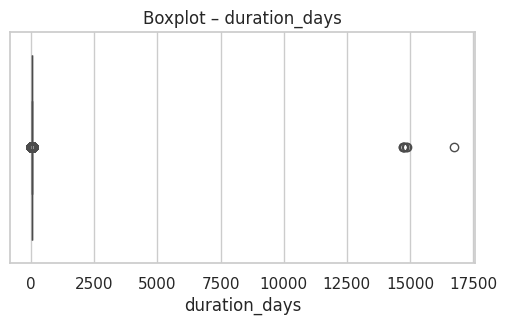

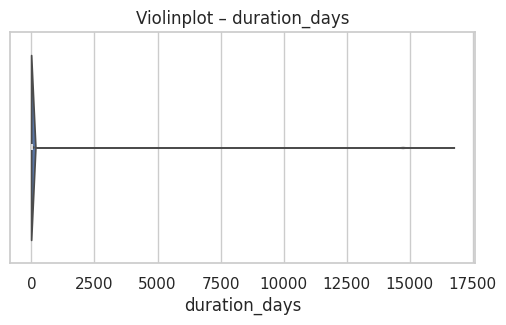

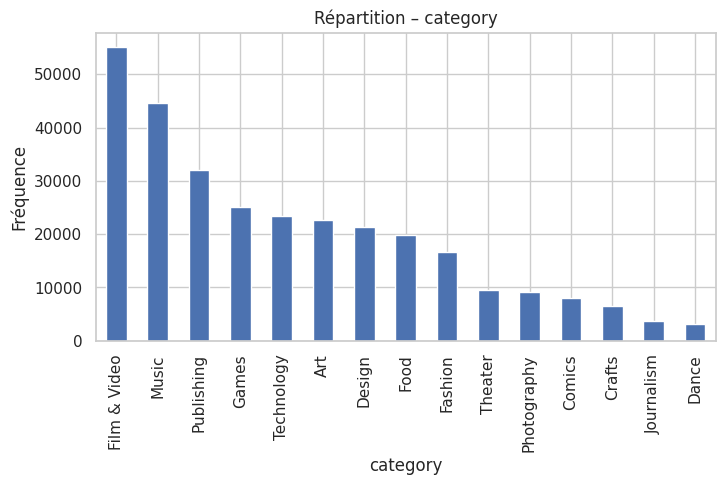

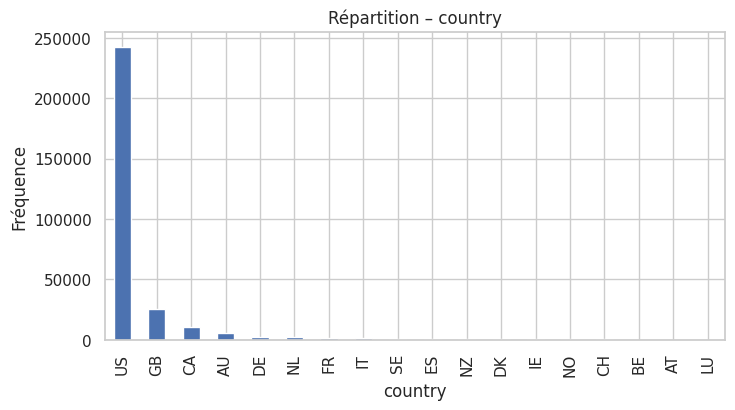

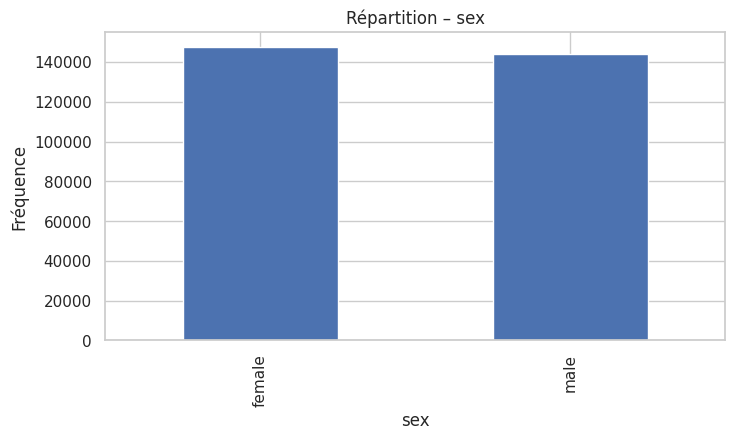

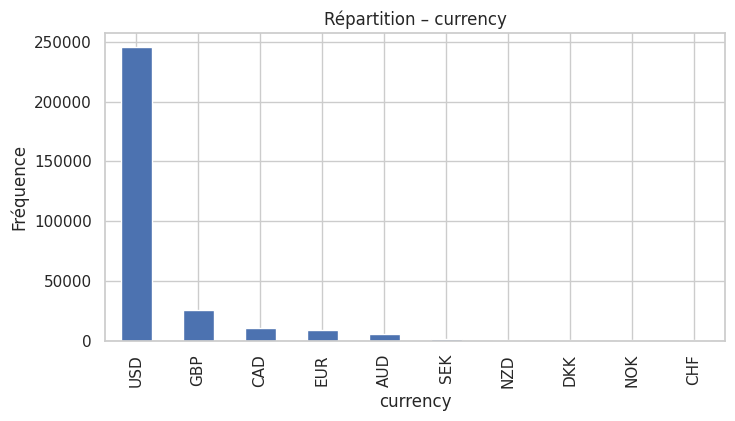

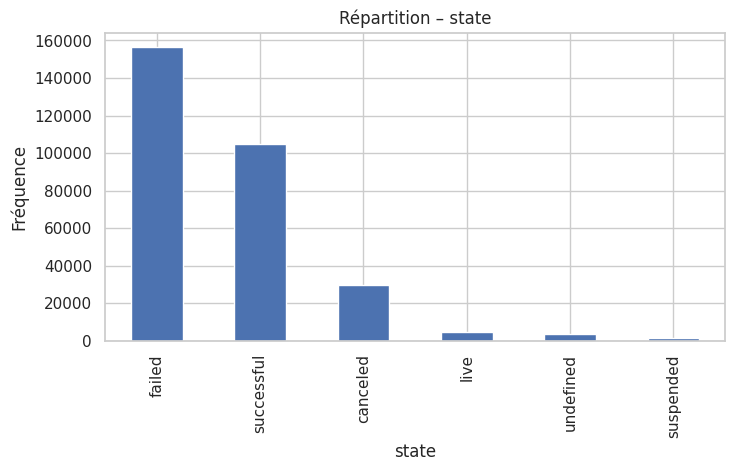

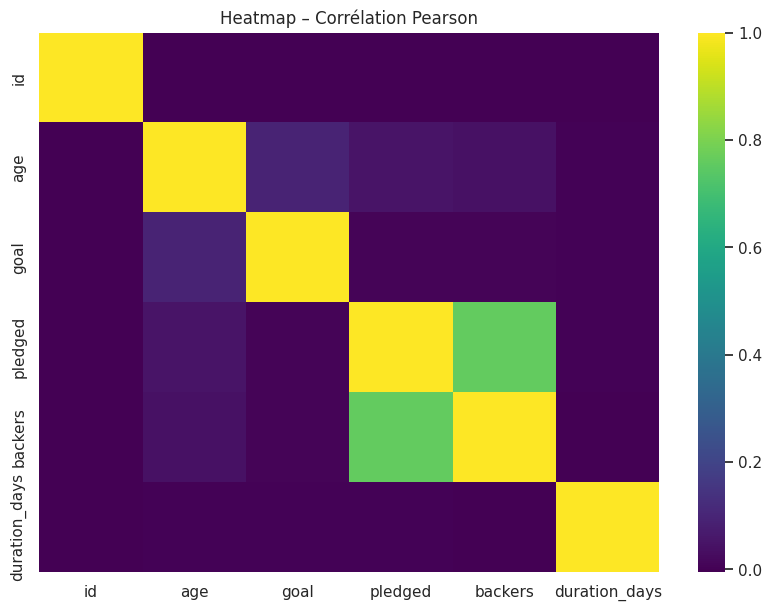

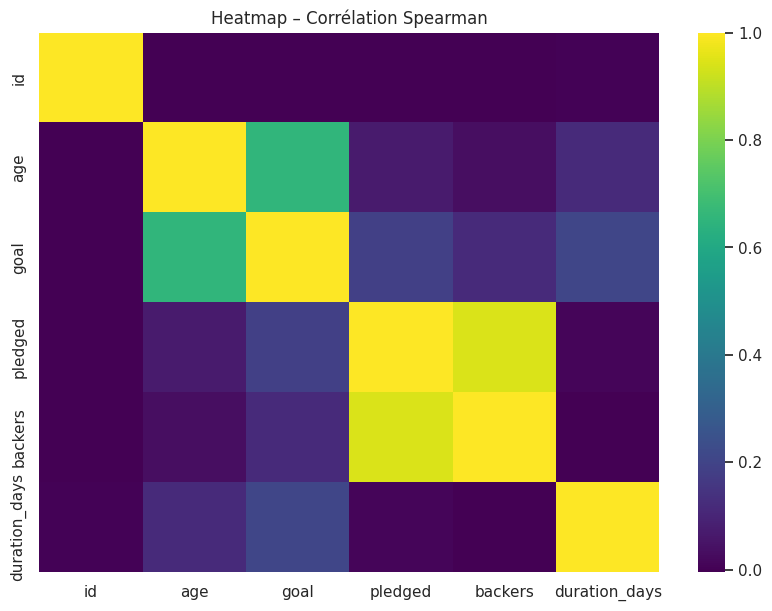

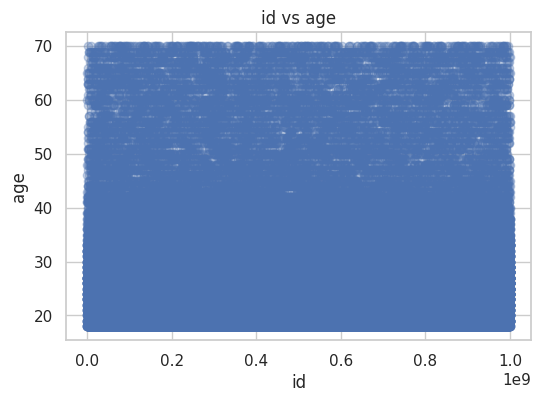

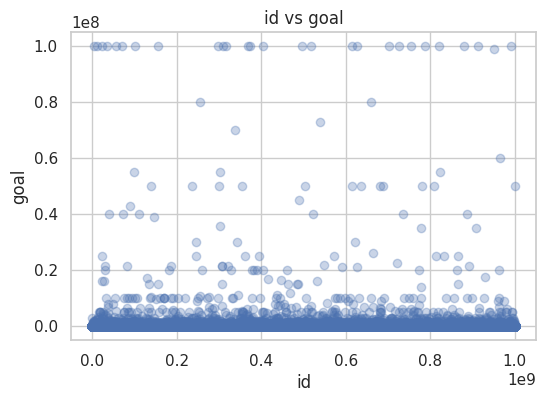

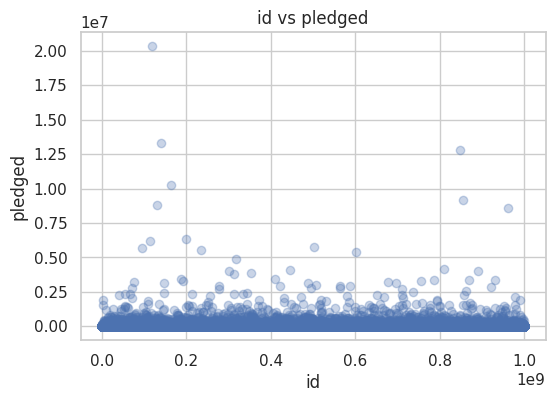

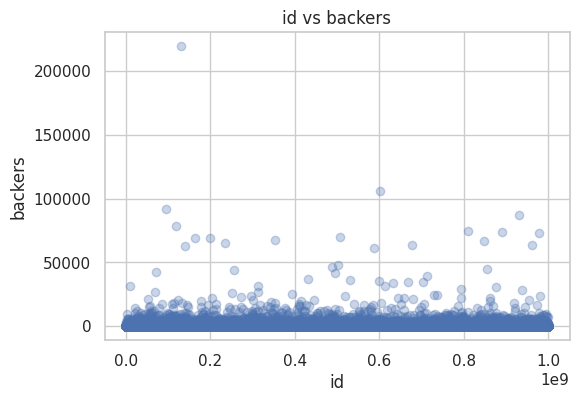

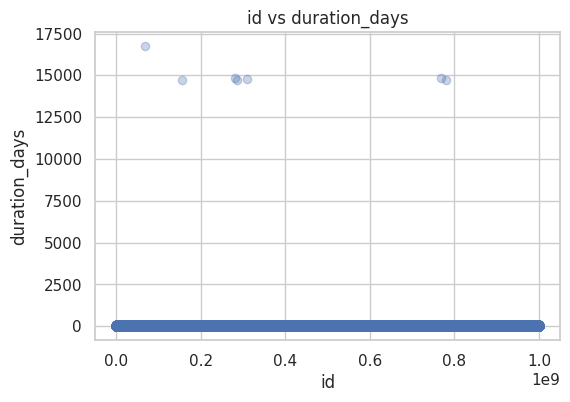

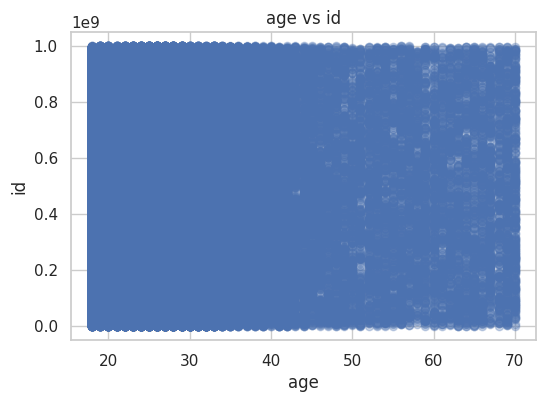

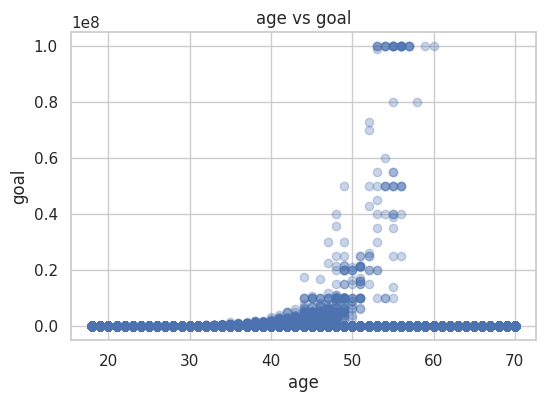

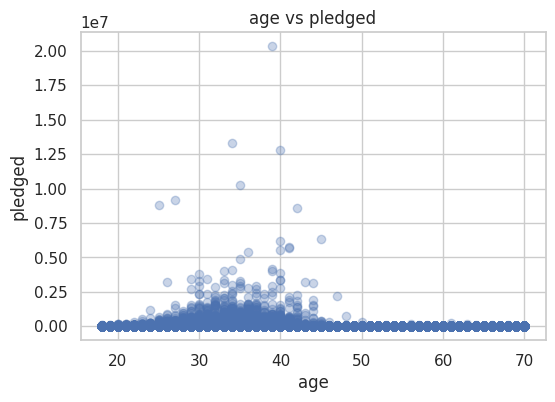

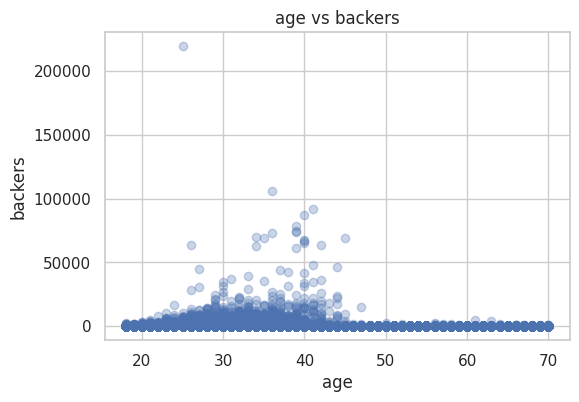

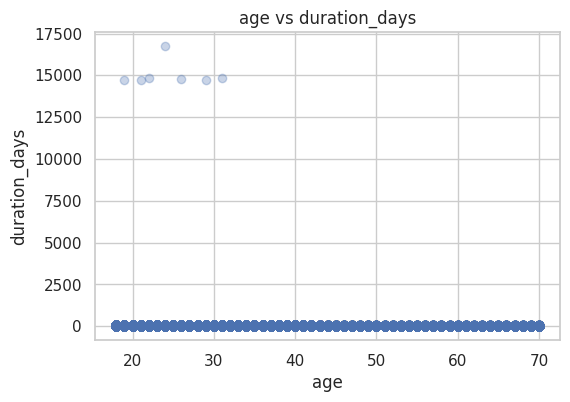

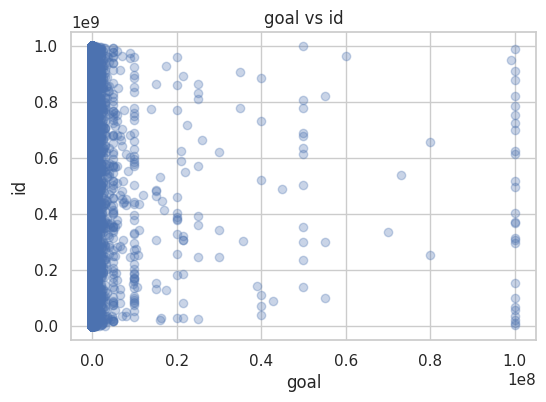

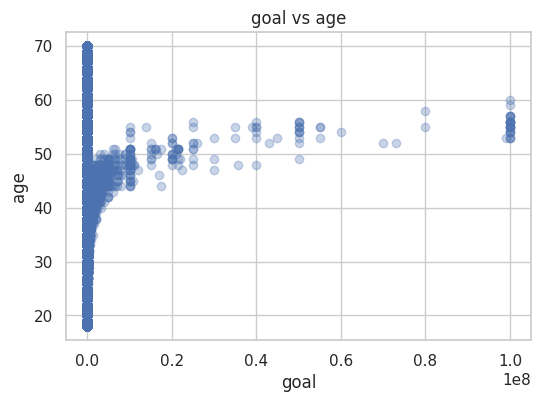

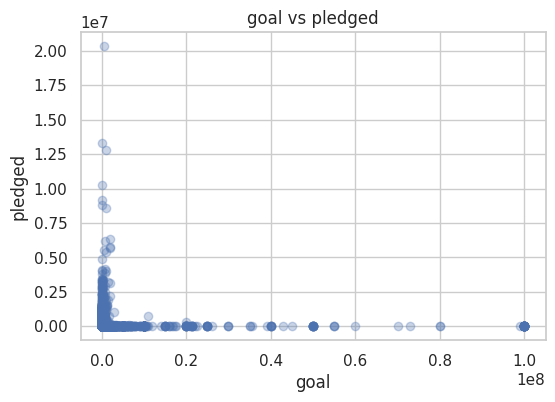

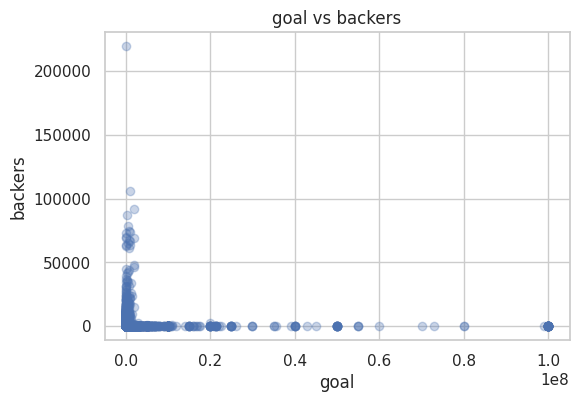

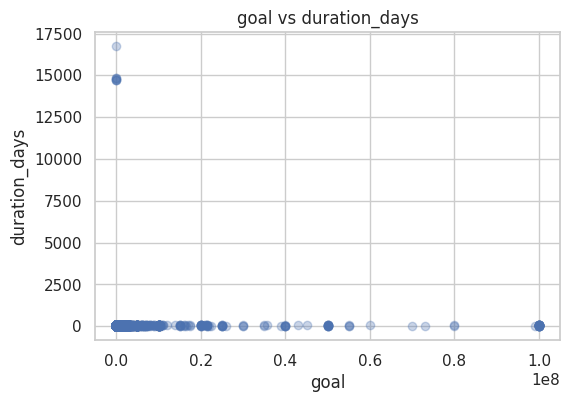

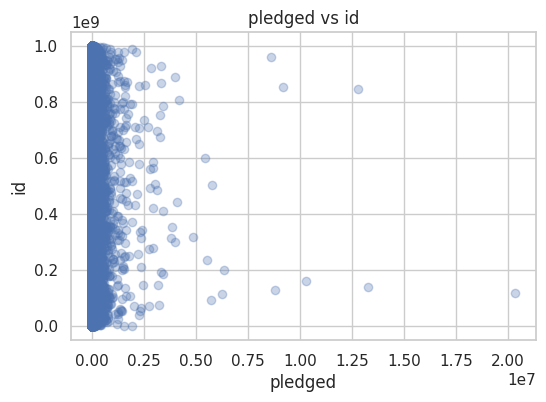

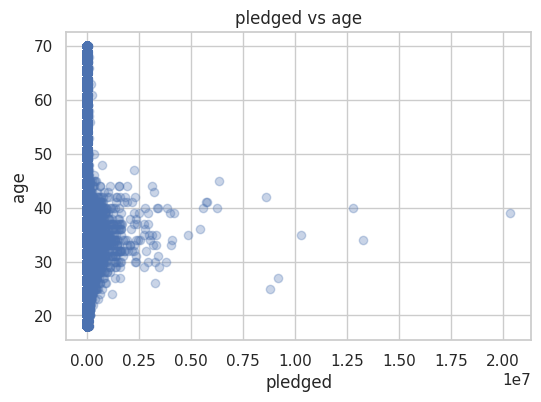

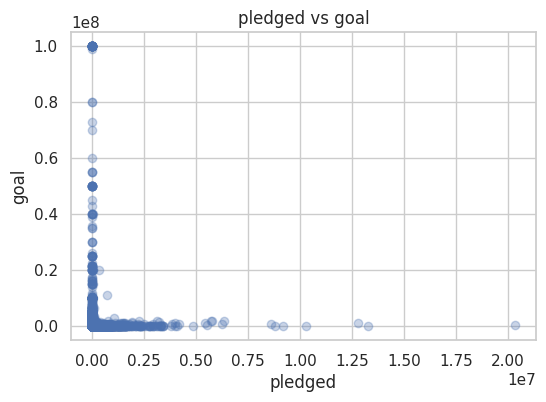

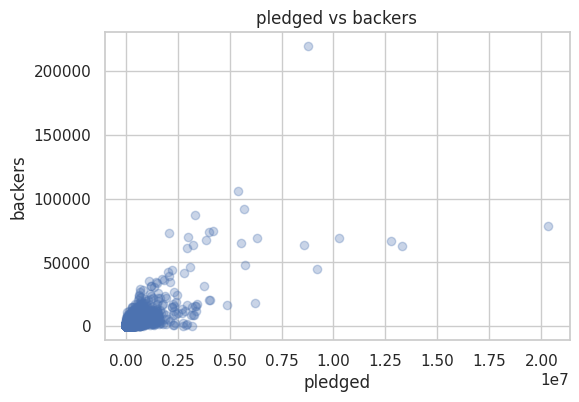

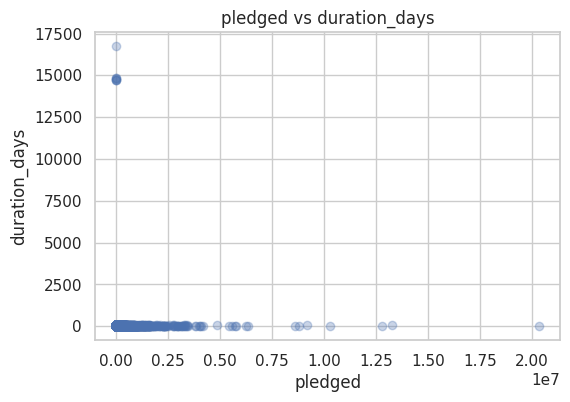

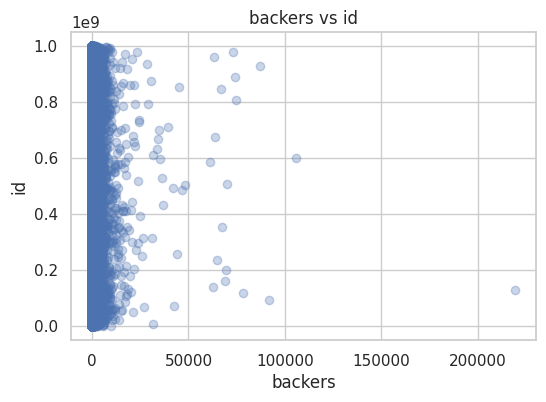

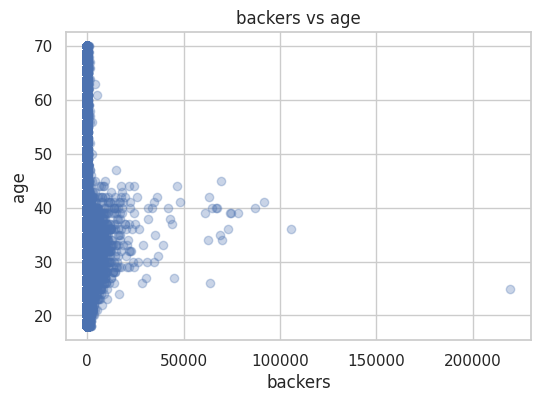

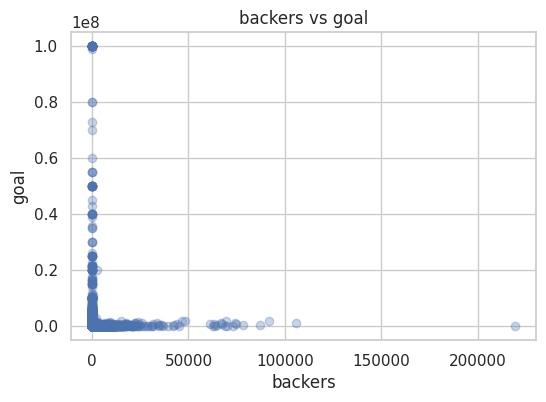

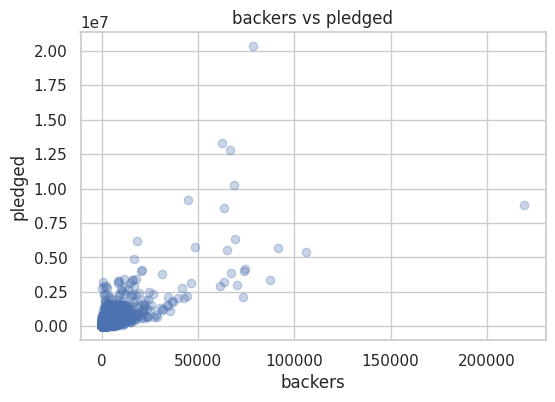

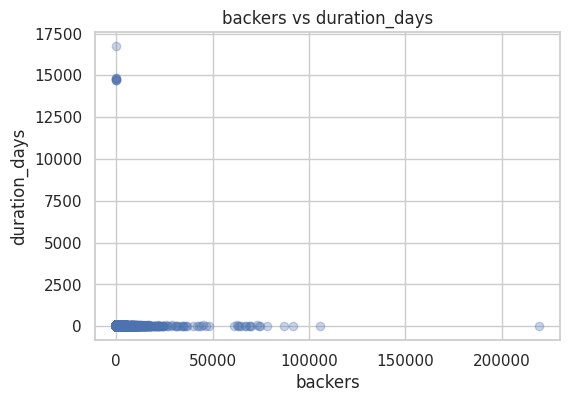

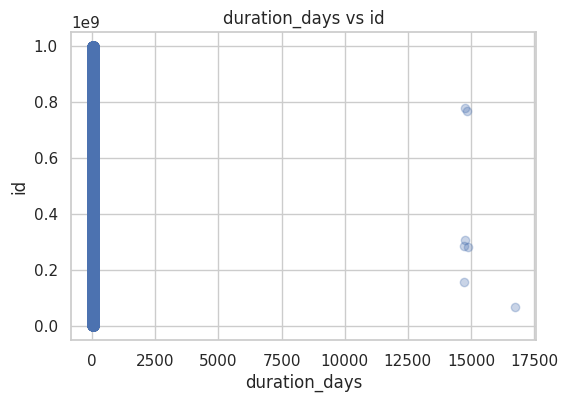

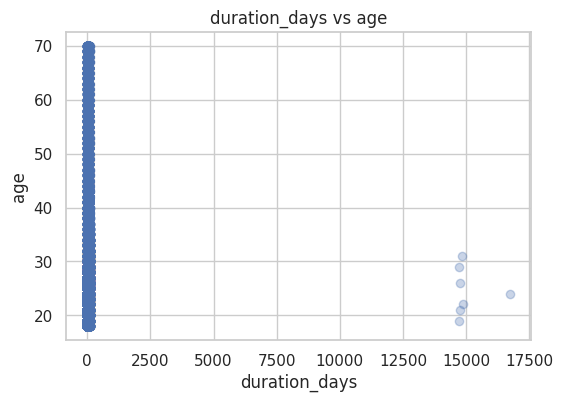

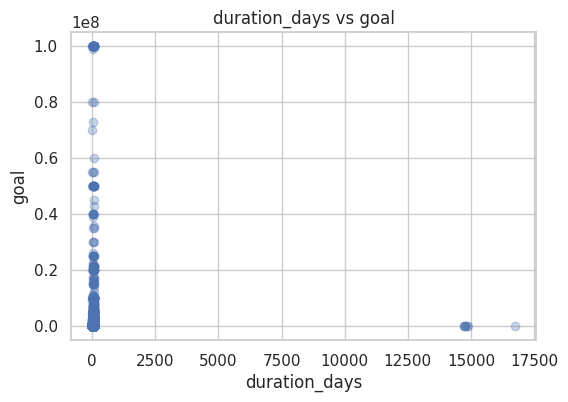

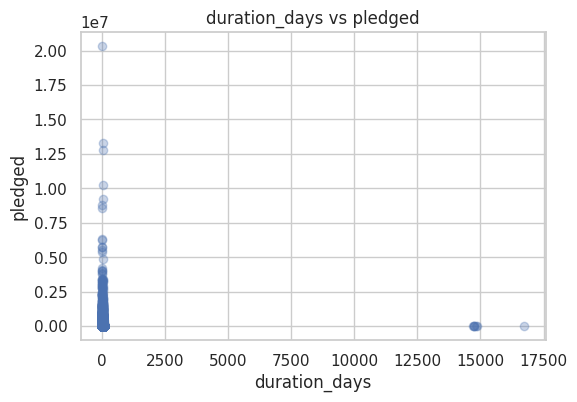

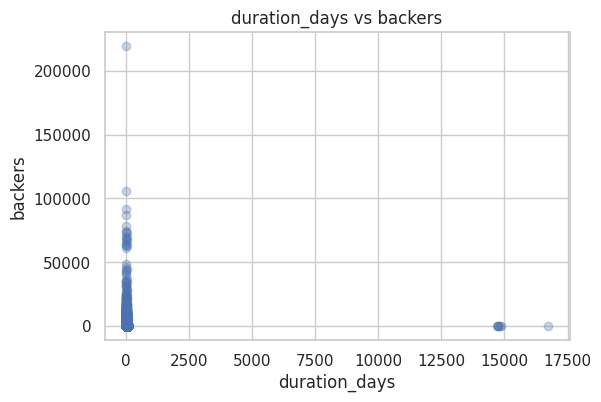

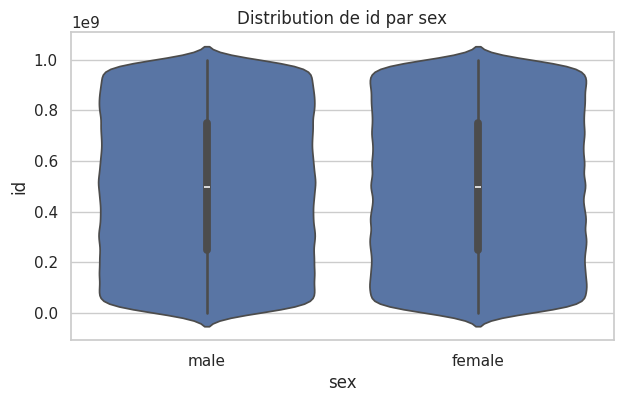

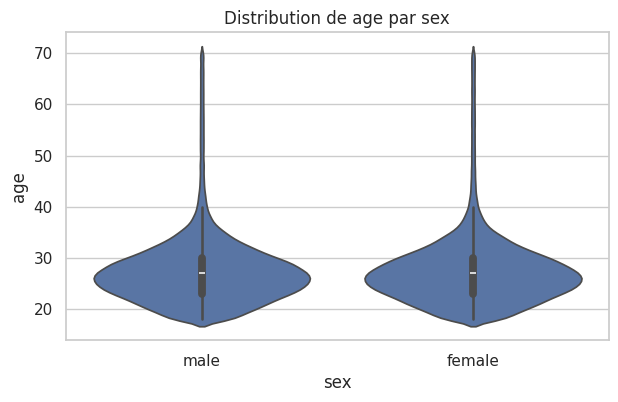

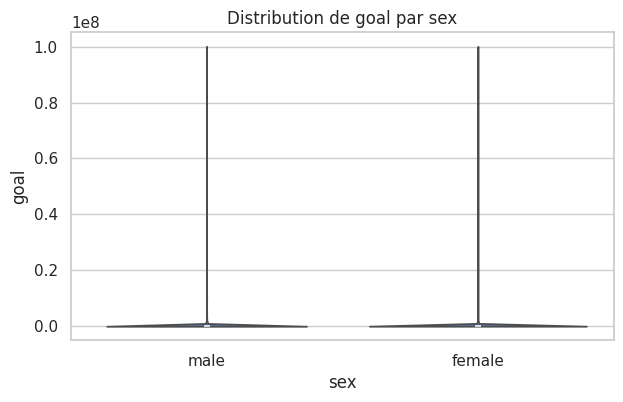

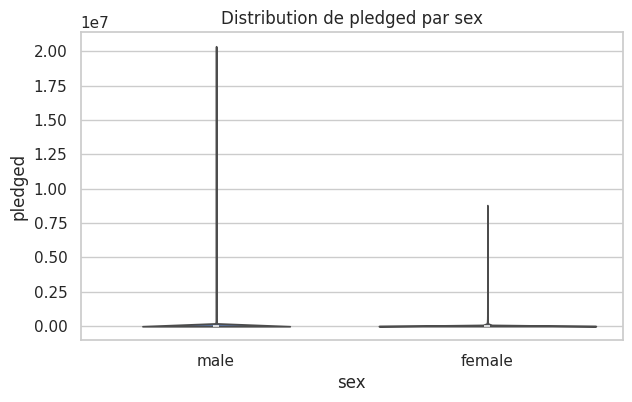

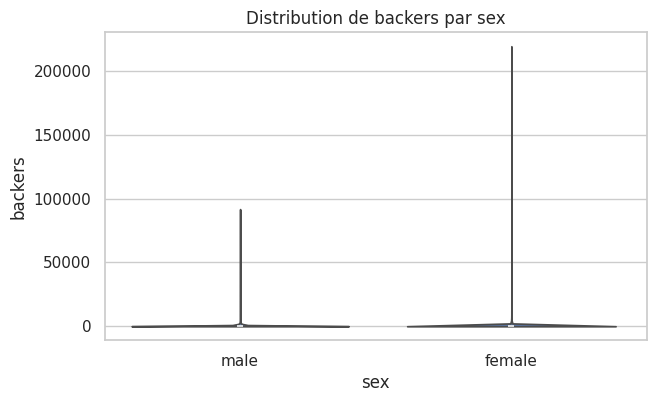

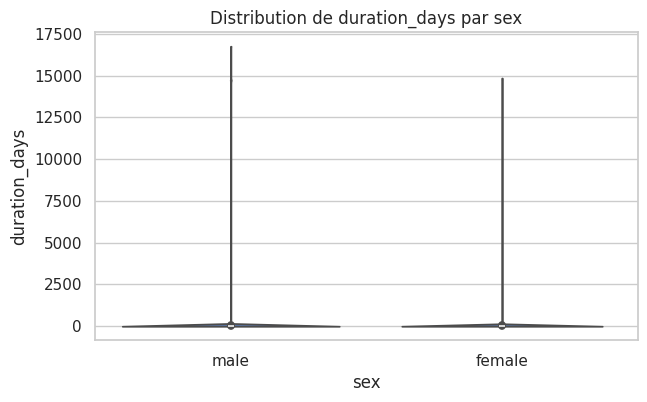

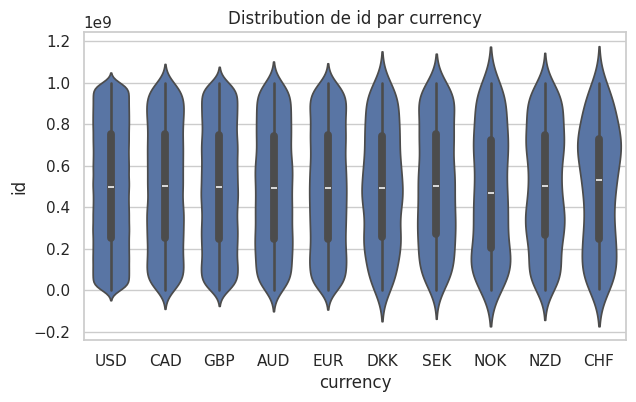

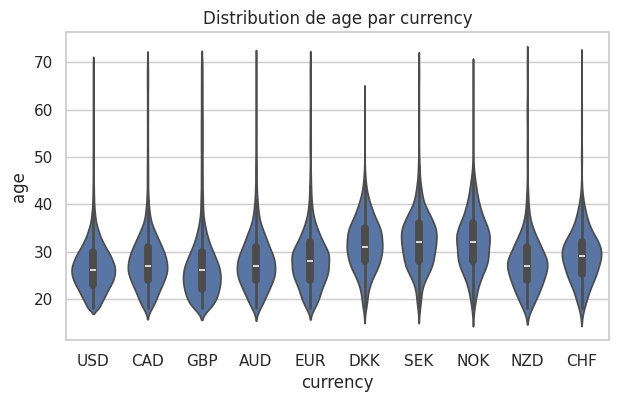

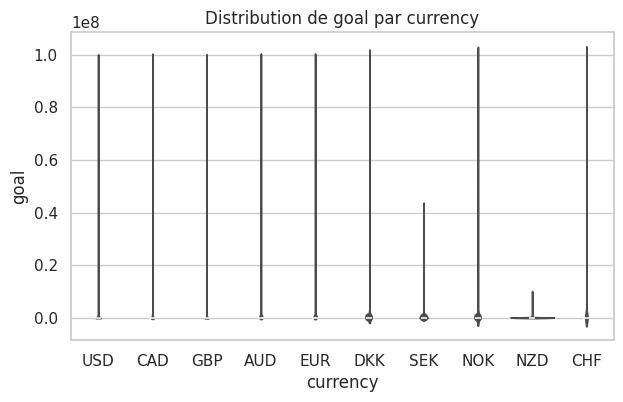

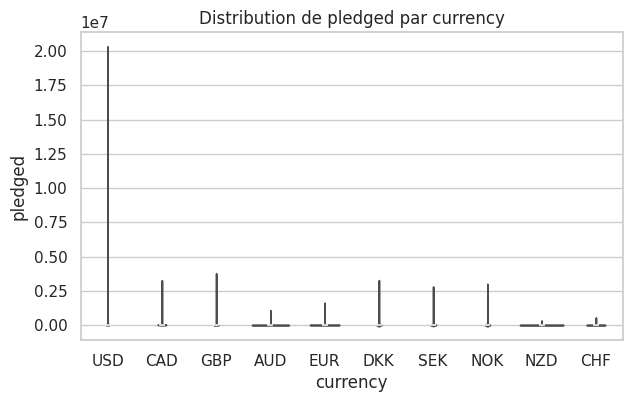

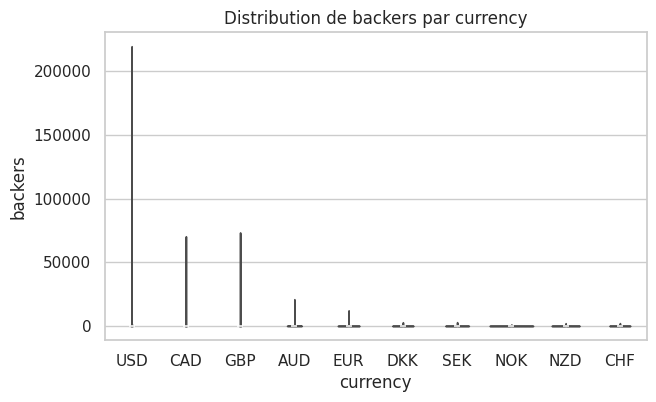

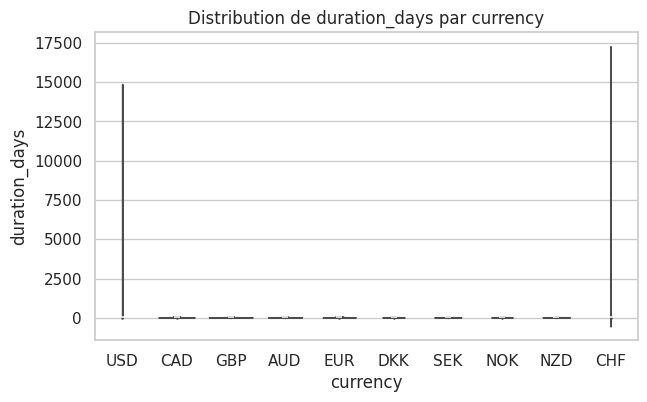

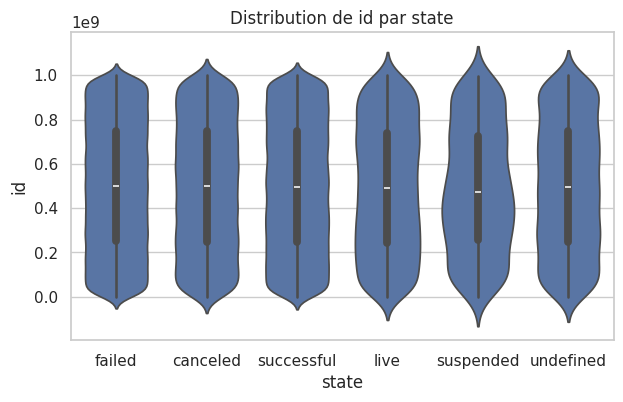

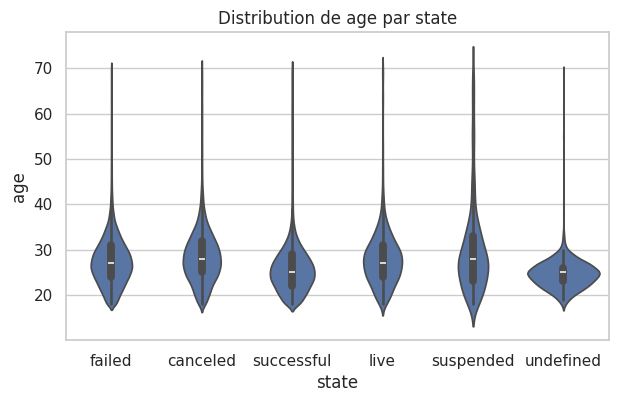

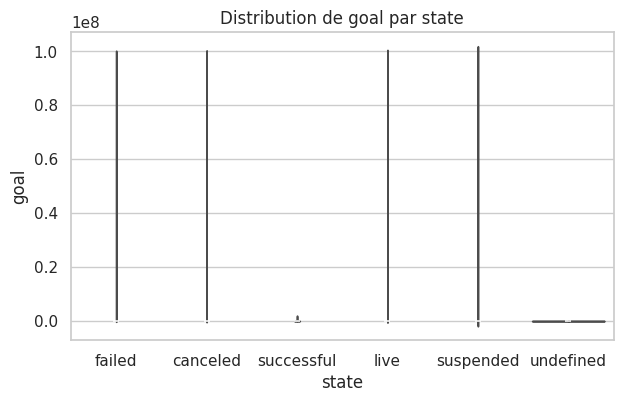

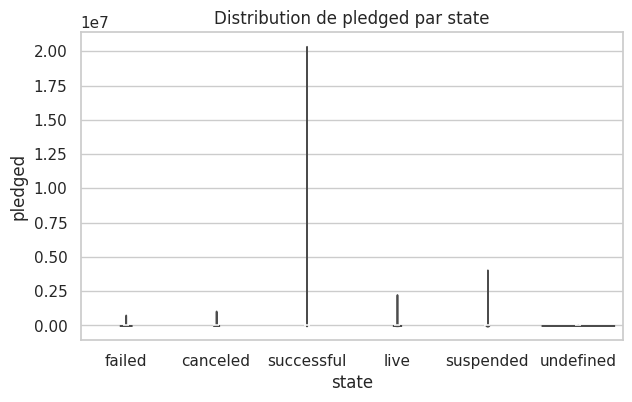

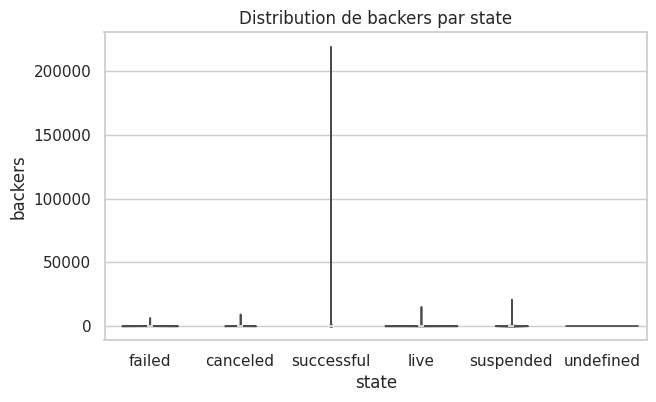

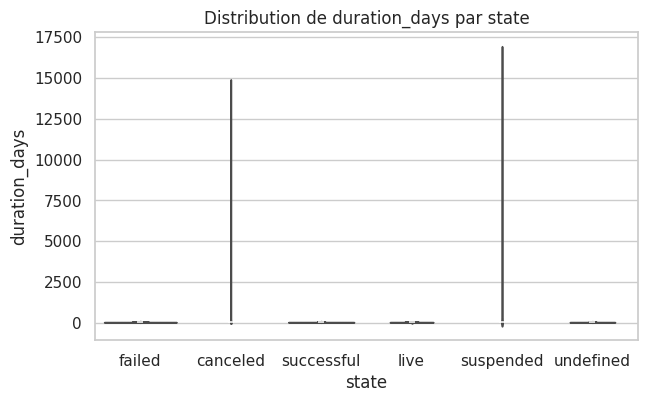

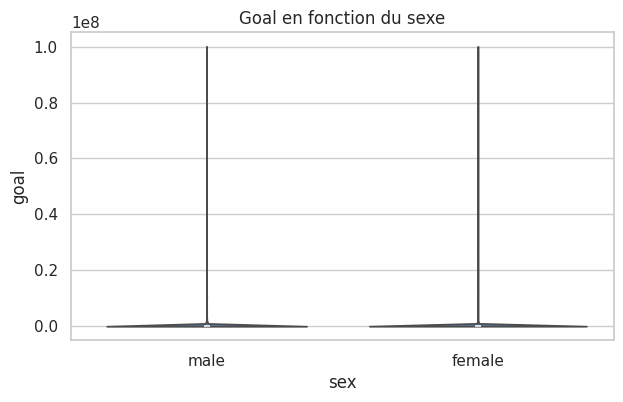

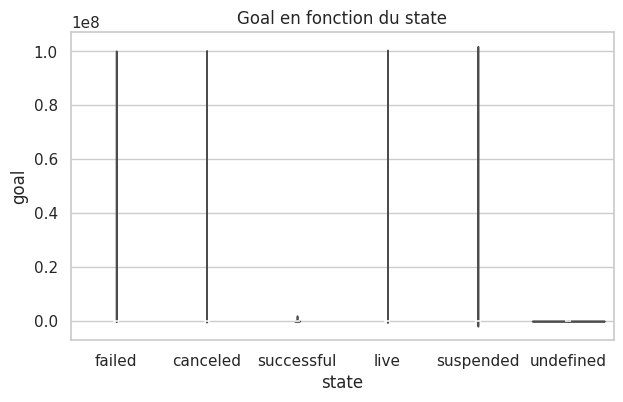

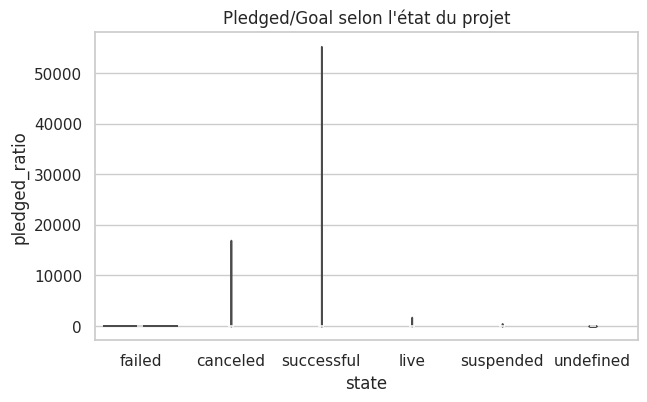

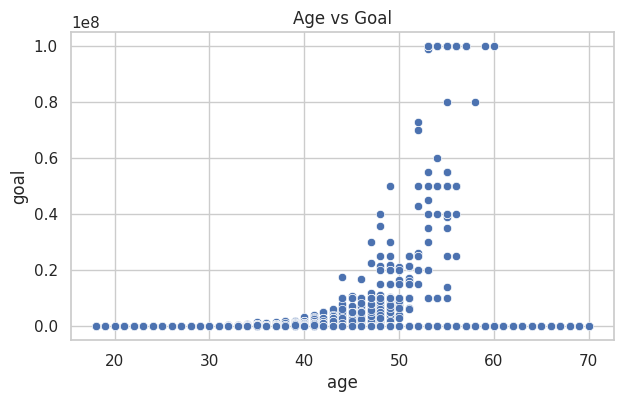

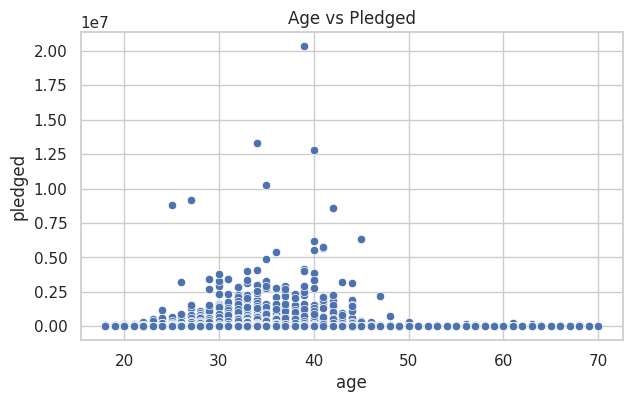

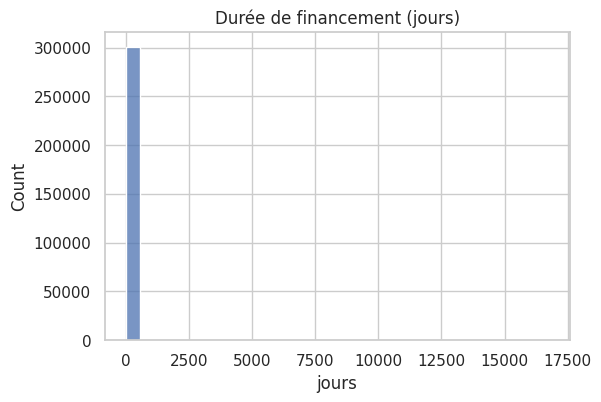

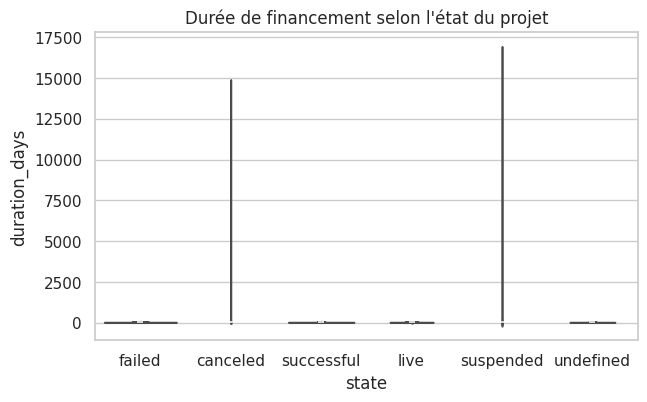

In [ ]:
# =====================================
# IMPORTS
# =====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype, is_object_dtype

sns.set(style="whitegrid")

# =====================================
# CHARGEMENT CSV
# =====================================
df = pd.read_csv('ks-projects.csv', encoding='latin1')

# =====================================
# CREATION : durée de financement (en jours)
# =====================================
df["start_date"] = pd.to_datetime(df["start_date"])
df["end_date"] = pd.to_datetime(df["end_date"])
df["duration_days"] = (df["end_date"] - df["start_date"]).dt.days

# =====================================
# INFOS
# =====================================
print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])
print("\nTypes des colonnes :")
print(df.dtypes)
print("\nStatistiques descriptives :")
display(df.describe(include='all'))

# =====================================
# COLONNES NUMÉRIQUES & CATÉGORIELLES
# =====================================
num_cols = [c for c in df.columns if is_numeric_dtype(df[c])]
cat_cols = [c for c in df.columns if is_object_dtype(df[c])]

# =====================================
# VALEURS MODALES
# =====================================
print("\nValeurs modales des colonnes :")
display(df.mode().iloc[0])

# =====================================
# HISTOGRAMMES (colonnes numériques)
# =====================================
for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogramme : {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

# =====================================
# HISTOGRAMMES LOG-SCALE (goal, pledged, backers)
# =====================================
for col in ["goal", "pledged", "backers"]:
    plt.figure(figsize=(6,4))
    plt.hist(np.log1p(df[col]), bins=30)
    plt.title(f"Distribution LOG({col})")
    plt.xlabel(f"log({col})")
    plt.ylabel("Fréquence")
    plt.show()

# =====================================
# BOX-PLOT & VIOLINPLOT POUR CHAQUE VARIABLE NUMERIQUE
# =====================================
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot – {col}")
    plt.show()

    plt.figure(figsize=(6,3))
    sns.violinplot(x=df[col])
    plt.title(f"Violinplot – {col}")
    plt.show()

# =====================================
# BARPLOTS POUR LES CATÉGORIELLES
# =====================================
for col in cat_cols:
    if df[col].nunique() <= 25:
        plt.figure(figsize=(8,4))
        df[col].value_counts().plot(kind="bar")
        plt.title(f"Répartition – {col}")
        plt.ylabel("Fréquence")
        plt.show()

# =====================================
# CORRÉLATIONS ENTRE VARIABLES NUMÉRIQUES
# =====================================
corr_pearson = df[num_cols].corr(method="pearson")
corr_spearman = df[num_cols].corr(method="spearman")
corr_kendall = df[num_cols].corr(method="kendall")

plt.figure(figsize=(10,7))
sns.heatmap(corr_pearson, cmap="viridis")
plt.title("Heatmap – Corrélation Pearson")
plt.show()

plt.figure(figsize=(10,7))
sns.heatmap(corr_spearman, cmap="viridis")
plt.title("Heatmap – Corrélation Spearman")
plt.show()

# =====================================
# SCATTERPLOTS ENTRE PAIRES NUMÉRIQUES
# =====================================
for x in num_cols:
    for y in num_cols:
        if x != y:
            plt.figure(figsize=(6,4))
            plt.scatter(df[x], df[y], alpha=0.3)
            plt.xlabel(x)
            plt.ylabel(y)
            plt.title(f"{x} vs {y}")
            plt.show()

# =====================================
# ASSOCIATION : NUMERIQUE vs CATÉGORIEL
# Exemple : goal selon le sexe
# =====================================
for col in cat_cols:
    if df[col].nunique() <= 10:
        for num in num_cols:
            plt.figure(figsize=(7,4))
            sns.violinplot(x=df[col], y=df[num])
            plt.title(f"Distribution de {num} par {col}")
            plt.show()

# =====================================
# ANALYSES SPÉCIFIQUES DEMANDÉES
# =====================================

# Homme / Femme vs goal
plt.figure(figsize=(7,4))
sns.violinplot(x=df["sex"], y=df["goal"])
plt.title("Goal en fonction du sexe")
plt.show()

# Goal vs State
plt.figure(figsize=(7,4))
sns.violinplot(x=df["state"], y=df["goal"])
plt.title("Goal en fonction du state")
plt.show()

# Pledged / Goal ratio (succès relatif)
df["pledged_ratio"] = df["pledged"] / df["goal"].replace(0, np.nan)

plt.figure(figsize=(7,4))
sns.violinplot(x=df["state"], y=df["pledged_ratio"])
plt.title("Pledged/Goal selon l'état du projet")
plt.show()

# Age vs Goal / Pledged
plt.figure(figsize=(7,4))
sns.scatterplot(x=df["age"], y=df["goal"])
plt.title("Age vs Goal")
plt.show()

plt.figure(figsize=(7,4))
sns.scatterplot(x=df["age"], y=df["pledged"])
plt.title("Age vs Pledged")
plt.show()

# Durée de financement
plt.figure(figsize=(6,4))
sns.histplot(df["duration_days"], bins=30)
plt.title("Durée de financement (jours)")
plt.xlabel("jours")
plt.show()

plt.figure(figsize=(7,4))
sns.violinplot(x=df["state"], y=df["duration_days"])
plt.title("Durée de financement selon l'état du projet")
plt.show()
